Training with batch size: 16
Training with batch size: 32
Training with batch size: 64


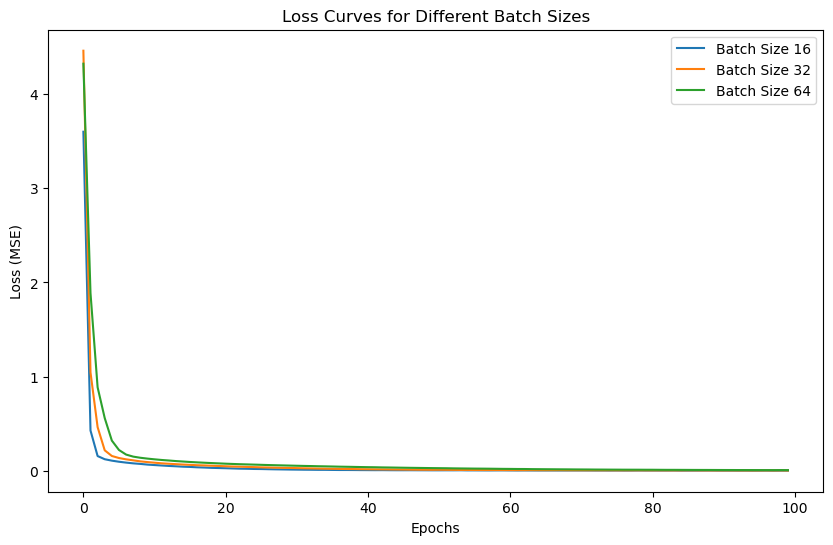

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Generate synthetic housing data
np.random.seed(42)
X = np.random.rand(1000, 10)  # 10 features
Y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(1000) * 0.1  # Linear relation with noise

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple regression model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Batch sizes to compare
batch_sizes = [16, 32, 64]
history_dict = {}

# Train models with different batch sizes
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    model = build_model()
    history = model.fit(X_train, Y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=0)
    history_dict[batch_size] = history.history['loss']

# Plot loss curves
plt.figure(figsize=(10, 6))
for batch_size, loss in history_dict.items():
    plt.plot(loss, label=f'Batch Size {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curves for Different Batch Sizes')
plt.legend()
plt.show()